In [1]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import ob

In [2]:
m12i_data = pd.read_hdf("Alignment_z/data_lmcAlignment_z_m12i_res7100.h5")
m12f_data = pd.read_hdf("Alignment_z/data_lmcAlignment_z_m12f_res7100.h5")
m12w_data = pd.read_hdf("Alignment_z/data_lmcAlignment_z_m12w_res7100.h5")
m12m_data = pd.read_hdf("Alignment_z/data_lmcAlignment_z_m12m_res7100.h5")

In [3]:
vfunc = np.vectorize(ob.cvtSnapshot)
pl.rcParams["font.family"] = "serif"
pericenter = pd.read_hdf("data_pericenters.h5")

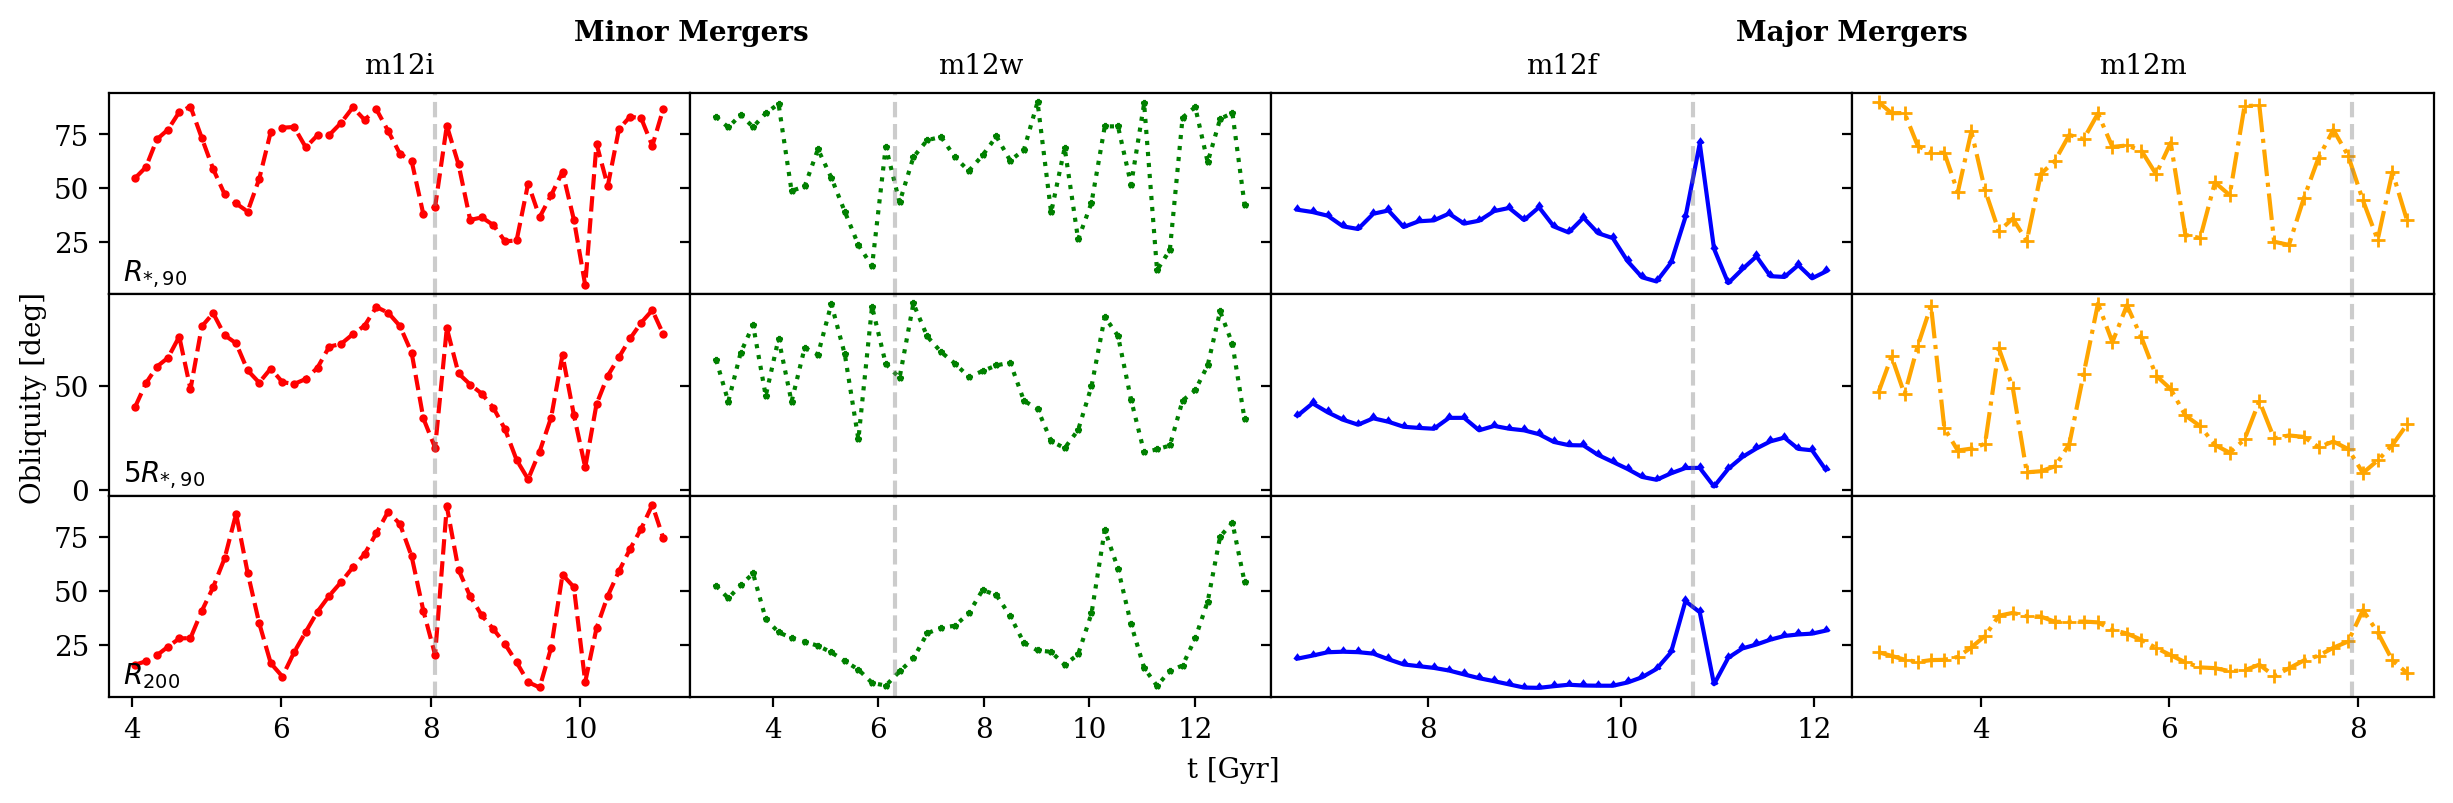

In [4]:
fig, axs = pl.subplots(3, 4, dpi=200, sharex="col", sharey="row", figsize=(15, 4))

(
    [disk_i, disk_m, disk_f, disk_w],
    [disk5_i, disk5_m, disk5_f, disk5_w],
    [vir_i, vir_m, vir_f, vir_w],
) = axs

domain = np.arange(0, 13)

disk_f.plot(
    vfunc(m12f_data["snapshot"]),
    m12f_data["disk"],
    ms=2,
    c="blue",
    marker=10,
    label="m12f",
)
disk_i.plot(
    vfunc(m12i_data["snapshot"]),
    m12i_data["disk"],
    ms=2,
    c="red",
    marker="o",
    label="m12i",
    ls="dashed",
)
disk_m.plot(
    vfunc(m12m_data["snapshot"]),
    m12m_data["disk"],
    ms=2,
    c="green",
    marker="*",
    label="m12m",
    ls="dotted",
)
disk_w.plot(
    vfunc(m12w_data["snapshot"]),
    m12w_data["disk"],
    ms=5,
    c="orange",
    marker="+",
    label="m12w",
    ls="dashdot",
)

disk5_f.plot(
    vfunc(m12f_data["snapshot"]),
    m12f_data["5.disk"],
    ms=2,
    c="blue",
    marker=10,
    label="m12f",
)
disk5_i.plot(
    vfunc(m12i_data["snapshot"]),
    m12i_data["5.disk"],
    ms=2,
    c="red",
    marker="o",
    label="m12i",
    ls="dashed",
)
disk5_m.plot(
    vfunc(m12m_data["snapshot"]),
    m12m_data["5.disk"],
    ms=2,
    c="green",
    marker="*",
    label="m12m",
    ls="dotted",
)
disk5_w.plot(
    vfunc(m12w_data["snapshot"]),
    m12w_data["5.disk"],
    ms=5,
    c="orange",
    marker="+",
    label="m12w",
    ls="dashdot",
)

vir_f.plot(
    vfunc(m12f_data["snapshot"]),
    m12f_data["virial"],
    ms=2,
    c="blue",
    marker=10,
    label="m12f",
)
vir_i.plot(
    vfunc(m12i_data["snapshot"]),
    m12i_data["virial"],
    ms=2,
    c="red",
    marker="o",
    label="m12i",
    ls="dashed",
)
vir_m.plot(
    vfunc(m12m_data["snapshot"]),
    m12m_data["virial"],
    ms=2,
    c="green",
    marker="*",
    label="m12m",
    ls="dotted",
)
vir_w.plot(
    vfunc(m12w_data["snapshot"]),
    m12w_data["virial"],
    ms=5,
    c="orange",
    marker="+",
    label="m12w",
    ls="dashdot",
)

fig.text(0.5, 0.025, "t [Gyr]", ha="center")
fig.text(0.1, 0.5, "Obliquity [deg]", ha="center", rotation=90, va="center")

disk_f.axvline(pericenter["m12f"]["peri.t"], alpha=0.4, c="gray", ls="dashed")
disk5_f.axvline(pericenter["m12f"]["peri.t"], alpha=0.4, c="gray", ls="dashed")
vir_f.axvline(pericenter["m12f"]["peri.t"], alpha=0.4, c="gray", ls="dashed")

disk_i.axvline(pericenter["m12i"]["peri.t"], alpha=0.4, c="gray", ls="dashed")
disk5_i.axvline(pericenter["m12i"]["peri.t"], alpha=0.4, c="gray", ls="dashed")
vir_i.axvline(pericenter["m12i"]["peri.t"], alpha=0.4, c="gray", ls="dashed")

disk_m.axvline(pericenter["m12m"]["peri.t"], alpha=0.4, c="gray", ls="dashed")
disk5_m.axvline(pericenter["m12m"]["peri.t"], alpha=0.4, c="gray", ls="dashed")
vir_m.axvline(pericenter["m12m"]["peri.t"], alpha=0.4, c="gray", ls="dashed")

disk_w.axvline(pericenter["m12w"]["peri.t"], alpha=0.4, c="gray", ls="dashed")
disk5_w.axvline(pericenter["m12w"]["peri.t"], alpha=0.4, c="gray", ls="dashed")
vir_w.axvline(pericenter["m12w"]["peri.t"], alpha=0.4, c="gray", ls="dashed")

fig.text(
    0.8, 1.3, "Minor Mergers", transform=disk_i.transAxes, weight="bold", va="center"
)
fig.text(
    0.8, 1.3, "Major Mergers", transform=disk_f.transAxes, weight="bold", va="center"
)

fig.text(0.5, 1.1, "m12f", transform=disk_f.transAxes, ha="center")
fig.text(0.5, 1.1, "m12i", transform=disk_i.transAxes, ha="center")
fig.text(0.5, 1.1, "m12m", transform=disk_w.transAxes, ha="center")
fig.text(0.5, 1.1, "m12w", transform=disk_m.transAxes, ha="center")

disk_i.text(0.025, 0.07, "$R_{*,90}$", transform=disk_i.transAxes)
disk5_i.text(0.025, 0.07, "$5R_{*,90}$", transform=disk5_i.transAxes)
vir_i.text(0.025, 0.07, "$R_{200}$", transform=vir_i.transAxes)

fig.subplots_adjust(hspace=0, wspace=0)
pl.savefig("_plot_lmcAlignments_z.pdf")
pl.show()

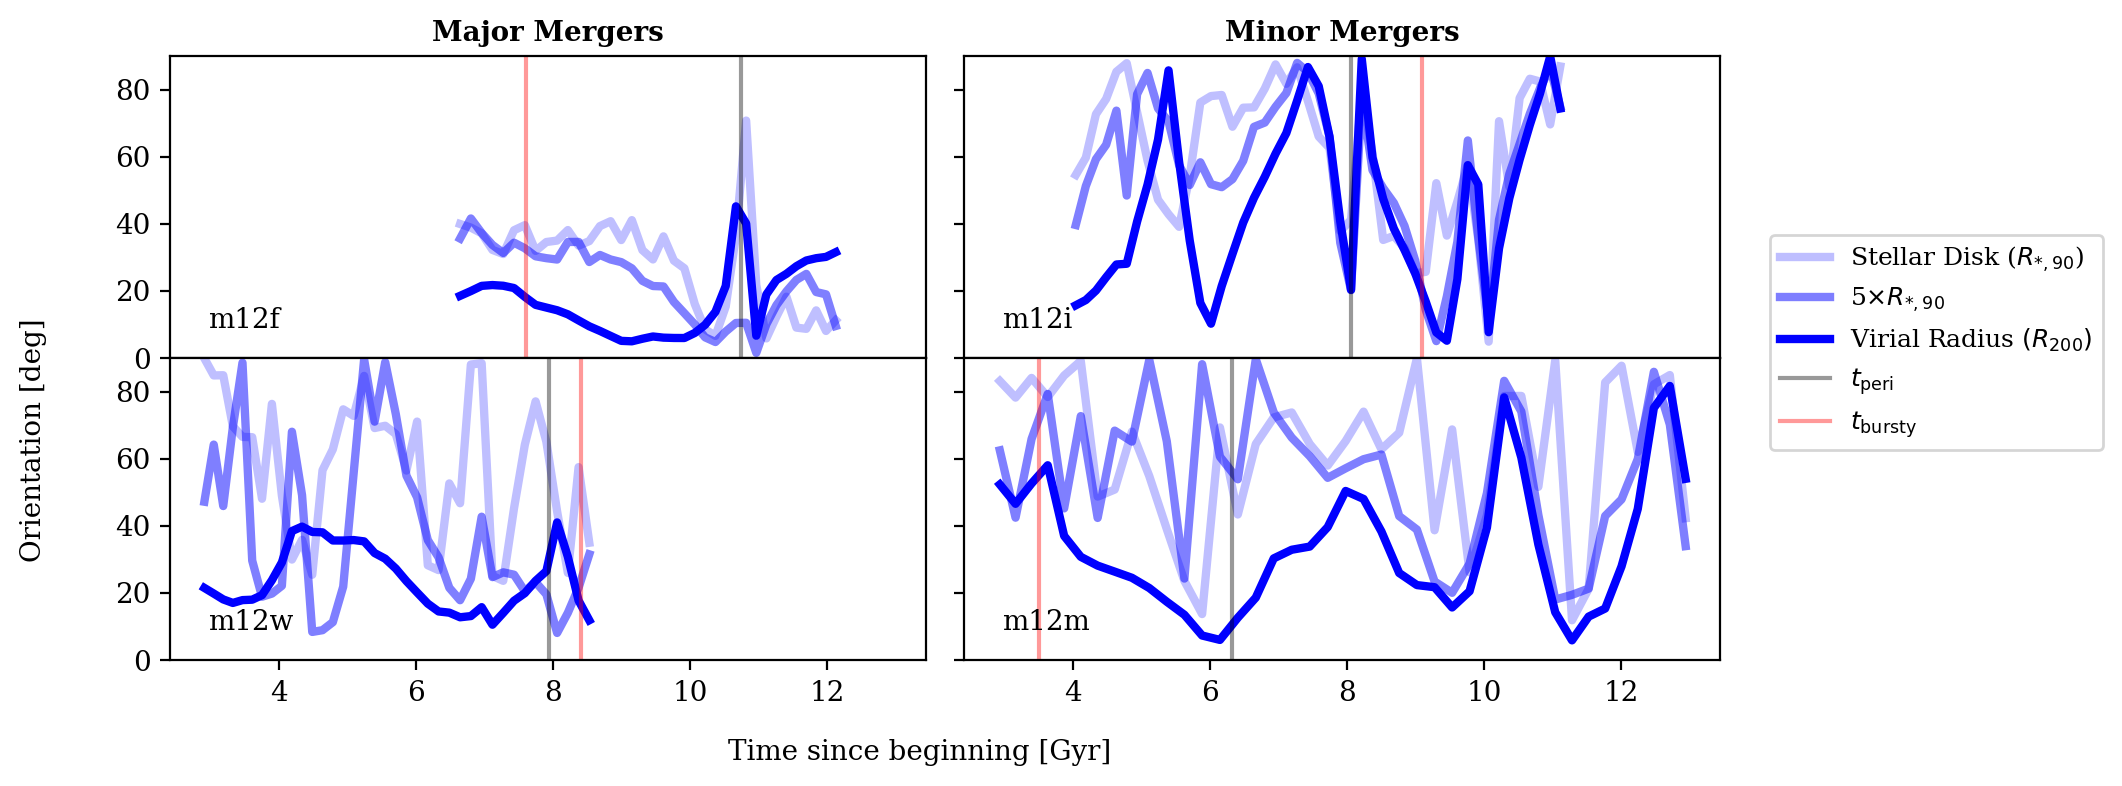

In [5]:
# fig, ax = pl.subplots(2, 2, dpi=200, sharex=True, sharey=True, figsize=(7,4))
fig, ax = pl.subplots(2, 2, dpi=200, sharex=True, sharey=True, figsize=(10, 4))

((ax_f, ax_i), (ax_w, ax_m)) = ax

ax_i.plot(
    vfunc(m12i_data["snapshot"]),
    m12i_data["disk"],
    c="b",
    alpha=0.25,
    label="Stellar Disk ($R_{*,90}$)",
    lw=3,
)
ax_i.plot(
    vfunc(m12i_data["snapshot"]),
    m12i_data["5.disk"],
    c="b",
    alpha=0.5,
    label="5$ \\times R_{*,90}$",
    lw=3,
)
ax_i.plot(
    vfunc(m12i_data["snapshot"]),
    m12i_data["virial"],
    c="b",
    label="Virial Radius $(R_{200})$",
    lw=3,
)

ax_f.plot(
    vfunc(m12f_data["snapshot"]),
    m12f_data["disk"],
    c="b",
    alpha=0.25,
    label="Stellar Disk ($R_{*,90}$)",
    lw=3,
)
ax_f.plot(
    vfunc(m12f_data["snapshot"]),
    m12f_data["5.disk"],
    c="b",
    alpha=0.5,
    label="5$ \\times R_{*,90}$",
    lw=3,
)
ax_f.plot(
    vfunc(m12f_data["snapshot"]),
    m12f_data["virial"],
    c="b",
    label="Virial Radius $(R_{200})$",
    lw=3,
)

ax_m.plot(vfunc(m12m_data["snapshot"]), m12m_data["disk"], c="b", alpha=0.25, lw=3)
ax_m.plot(vfunc(m12m_data["snapshot"]), m12m_data["5.disk"], c="b", alpha=0.5, lw=3)
ax_m.plot(vfunc(m12m_data["snapshot"]), m12m_data["virial"], c="b", lw=3)

ax_w.plot(vfunc(m12w_data["snapshot"]), m12w_data["disk"], c="b", alpha=0.25, lw=3)
ax_w.plot(vfunc(m12w_data["snapshot"]), m12w_data["5.disk"], c="b", alpha=0.5, lw=3)
ax_w.plot(vfunc(m12w_data["snapshot"]), m12w_data["virial"], c="b", lw=3)

ax_f.axvline(pericenter["m12f"]["peri.t"], alpha=0.4, c="k")
ax_i.axvline(pericenter["m12i"]["peri.t"], alpha=0.4, c="k", label="$t_\mathrm{peri}$")
ax_m.axvline(pericenter["m12m"]["peri.t"], alpha=0.4, c="k")
ax_w.axvline(pericenter["m12w"]["peri.t"], alpha=0.4, c="k")

ax_f.axvline(7.6, alpha=0.4, c="r")
ax_i.axvline(9.1, alpha=0.4, c="r", label="$t_\mathrm{bursty}$")
ax_m.axvline(3.5, alpha=0.4, c="r")
ax_w.axvline(8.4, alpha=0.4, c="r")

ax_m.text(0.05, 0.1, "m12m", transform=ax_m.transAxes)
ax_i.text(0.05, 0.1, "m12i", transform=ax_i.transAxes)
ax_f.text(0.05, 0.1, "m12f", transform=ax_f.transAxes)
ax_w.text(0.05, 0.1, "m12w", transform=ax_w.transAxes)

ax_i.legend(bbox_to_anchor=(1.05, 0.45), fontsize=9)

for a in ax.flatten():
    a.set_ylim(0, 90)

fig.subplots_adjust(hspace=0, wspace=0.05)

fig.text(0.05, 0.4, "Orientation [deg]", rotation=90, va="center")
fig.text(0.5, 0.0, "Time since beginning [Gyr]", ha="center")

ax_f.text(
    0.5, 1.05, "Major Mergers", ha="center", transform=ax_f.transAxes, fontweight="bold"
)
ax_i.text(
    0.5, 1.05, "Minor Mergers", ha="center", transform=ax_i.transAxes, fontweight="bold"
)

pl.savefig("lmc_alignment_z_may27.pdf", bbox_inches="tight")
pl.show()

In [26]:
from astropy.io.misc.hdf5 import read_table_hdf5

In [27]:
f_lmc = read_table_hdf5("lmc_positions_m12f_res7100.h5")
i_lmc = read_table_hdf5("lmc_positions_m12i_res7100.h5")
m_lmc = read_table_hdf5("lmc_positions_m12m_res7100.h5")
w_lmc = read_table_hdf5("lmc_positions_m12w_res7100.h5")

f_dist = np.sqrt(
    f_lmc["position"][:, 0] ** 2
    + f_lmc["position"][:, 1] ** 2
    + f_lmc["position"][:, 2] ** 2
)[np.in1d(f_lmc["snapshot"], m12f_data["snapshot"])]
i_dist = np.sqrt(
    i_lmc["position"][:, 0] ** 2
    + i_lmc["position"][:, 1] ** 2
    + i_lmc["position"][:, 2] ** 2
)[np.in1d(i_lmc["snapshot"], m12i_data["snapshot"])]
w_dist = np.sqrt(
    w_lmc["position"][:, 0] ** 2
    + w_lmc["position"][:, 1] ** 2
    + w_lmc["position"][:, 2] ** 2
)[np.in1d(w_lmc["snapshot"], m12w_data["snapshot"])]
m_dist = np.sqrt(
    m_lmc["position"][:, 0] ** 2
    + m_lmc["position"][:, 1] ** 2
    + m_lmc["position"][:, 2] ** 2
)[np.in1d(m_lmc["snapshot"], m12m_data["snapshot"])]

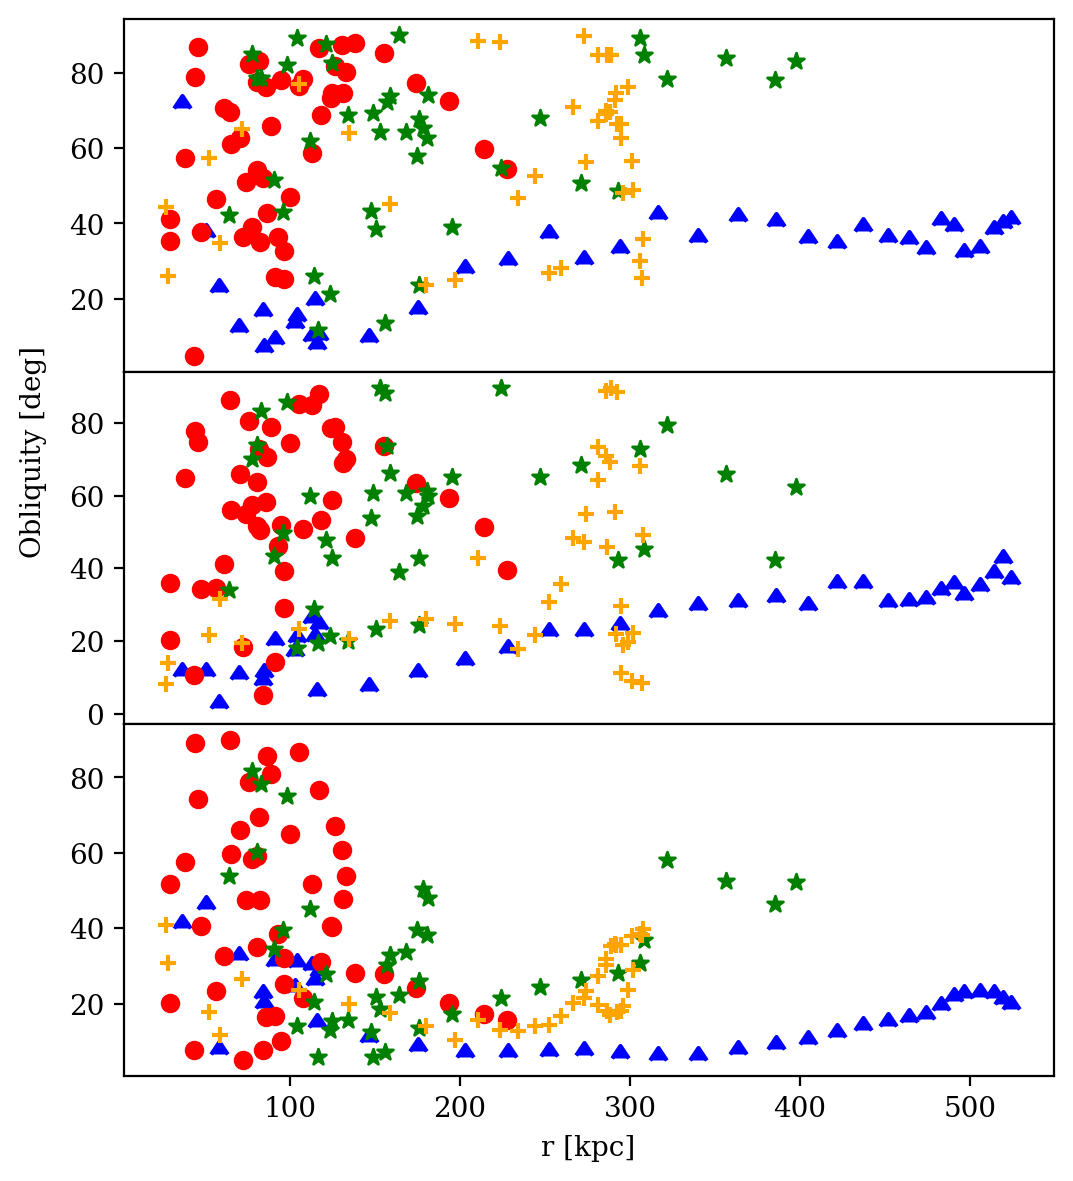

In [8]:
fig, axs = pl.subplots(3, dpi=200, sharex=True, figsize=(6, 7))

(rs90, rs90_5, r_vir) = axs

domain = np.arange(0, 13)

rs90.scatter(f_dist, m12f_data["disk"], c="blue", marker=10, label="m12f")
rs90.scatter(i_dist, m12i_data["disk"], c="red", marker="o", label="m12i")
rs90.scatter(m_dist, m12m_data["disk"], c="green", marker="*", label="m12m")
rs90.scatter(w_dist, m12w_data["disk"], c="orange", marker="+", label="m12w")

rs90_5.scatter(f_dist, m12f_data["5.disk"], c="blue", marker=10, label="m12f")
rs90_5.scatter(i_dist, m12i_data["5.disk"], c="red", marker="o", label="m12i")
rs90_5.scatter(m_dist, m12m_data["5.disk"], c="green", marker="*", label="m12m")
rs90_5.scatter(w_dist, m12w_data["5.disk"], c="orange", marker="+", label="m12w")

r_vir.scatter(f_dist, m12f_data["virial"], c="blue", marker=10, label="m12f")
r_vir.scatter(i_dist, m12i_data["virial"], c="red", marker="o", label="m12i")
r_vir.scatter(m_dist, m12m_data["virial"], c="green", marker="*", label="m12m")
r_vir.scatter(w_dist, m12w_data["virial"], c="orange", marker="+", label="m12w")

r_vir.set_xlabel("r [kpc]")
fig.text(0.05, 0.5, "Obliquity [deg]", ha="center", rotation=90)

fig.subplots_adjust(hspace=0)
pl.show()

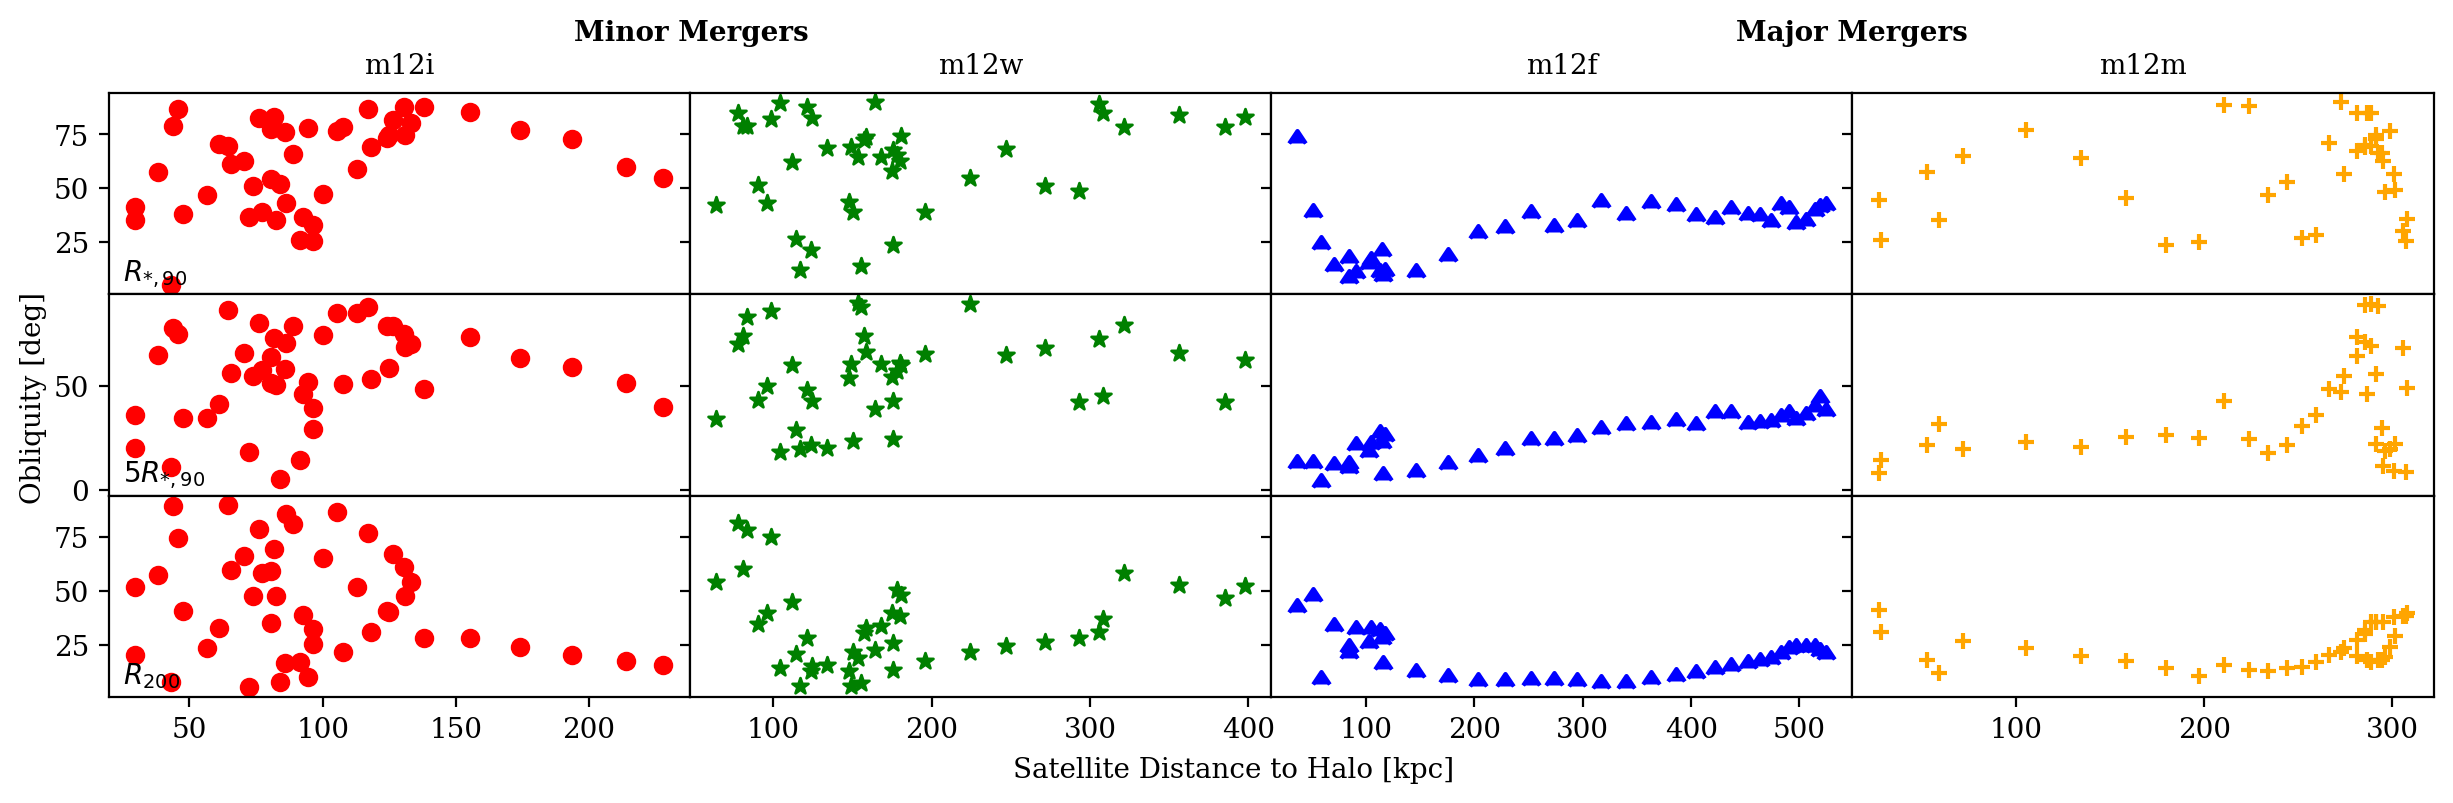

In [33]:
fig, axs = pl.subplots(3, 4, dpi=200, sharex="col", sharey="row", figsize=(15, 4))

(
    [disk_i, disk_m, disk_f, disk_w],
    [disk5_i, disk5_m, disk5_f, disk5_w],
    [vir_i, vir_m, vir_f, vir_w],
) = axs

disk_f.scatter(f_dist, m12f_data["disk"], c="blue", marker=10, label="m12f")
disk_i.scatter(i_dist, m12i_data["disk"], c="red", marker="o", label="m12i")
disk_m.scatter(m_dist, m12m_data["disk"], c="green", marker="*", label="m12m")
disk_w.scatter(w_dist, m12w_data["disk"], c="orange", marker="+", label="m12w")

disk5_f.scatter(f_dist, m12f_data["5.disk"], c="blue", marker=10, label="m12f")
disk5_i.scatter(i_dist, m12i_data["5.disk"], c="red", marker="o", label="m12i")
disk5_m.scatter(m_dist, m12m_data["5.disk"], c="green", marker="*", label="m12m")
disk5_w.scatter(w_dist, m12w_data["5.disk"], c="orange", marker="+", label="m12w")

vir_f.scatter(f_dist, m12f_data["virial"], c="blue", marker=10, label="m12f")
vir_i.scatter(i_dist, m12i_data["virial"], c="red", marker="o", label="m12i")
vir_m.scatter(m_dist, m12m_data["virial"], c="green", marker="*", label="m12m")
vir_w.scatter(w_dist, m12w_data["virial"], c="orange", marker="+", label="m12w")

fig.text(0.5, 0.025, "Satellite Distance to Halo [kpc]", ha="center")
fig.text(0.1, 0.5, "Obliquity [deg]", ha="center", rotation=90, va="center")

fig.text(
    0.8, 1.3, "Minor Mergers", transform=disk_i.transAxes, weight="bold", va="center"
)
fig.text(
    0.8, 1.3, "Major Mergers", transform=disk_f.transAxes, weight="bold", va="center"
)

fig.text(0.5, 1.1, "m12f", transform=disk_f.transAxes, ha="center")
fig.text(0.5, 1.1, "m12i", transform=disk_i.transAxes, ha="center")
fig.text(0.5, 1.1, "m12m", transform=disk_w.transAxes, ha="center")
fig.text(0.5, 1.1, "m12w", transform=disk_m.transAxes, ha="center")

disk_i.text(0.025, 0.07, "$R_{*,90}$", transform=disk_i.transAxes)
disk5_i.text(0.025, 0.07, "$5R_{*,90}$", transform=disk5_i.transAxes)
vir_i.text(0.025, 0.07, "$R_{200}$", transform=vir_i.transAxes)

fig.subplots_adjust(hspace=0, wspace=0)
pl.savefig("_plot_lmcAlignments_distance_z.pdf")
pl.show()